In [0]:
%tensorflow_version 2.x
import tensorflow as tf

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Given dataset is a Hierarical data format file with data stored in multidimensional structure.
# Need h5py lib for reading and accessing data
import h5py as h5
import numpy as np

In [0]:
file = h5.File('/content/drive/My Drive/Deep Learning/SVHN_single_grey1.h5', 'r')# r indicates the read mode 

In [9]:
list(file.keys())# lists down all the available key datasets, as observed we have 6 datasets

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']

In [11]:
#index,values and shape of above datasets 
for index, value in enumerate(list(file.keys())):
    value = np.array (file.get(value))    
    print('shape of {}'.format(index) , value.shape)

shape of 0 (18000, 32, 32)
shape of 1 (42000, 32, 32)
shape of 2 (60000, 32, 32)
shape of 3 (18000,)
shape of 4 (42000,)
shape of 5 (60000,)


In [0]:
X_test = np.array(file.get('X_test'))
X_train = np.array(file.get('X_train'))
X_val = np.array(file.get('X_val'))

In [14]:
print('Sizes of test, train and val images')
print(X_test.shape)
print(X_train.shape)
print(X_val.shape)

Sizes of test, train and val images
(18000, 32, 32)
(42000, 32, 32)
(60000, 32, 32)


In [0]:
# As observed the image sizes are 32 by 32 pixels

In [0]:
y_test = np.array(file.get('y_test'))
y_train = np.array(file.get('y_train'))
y_val = np.array(file.get('y_val'))

In [17]:
print ('X_train ',type(X_train))
print ('y_train ',type(y_train))

X_train  <class 'numpy.ndarray'>
y_train  <class 'numpy.ndarray'>


Displaying 10 images for train, test and val
----------------- 


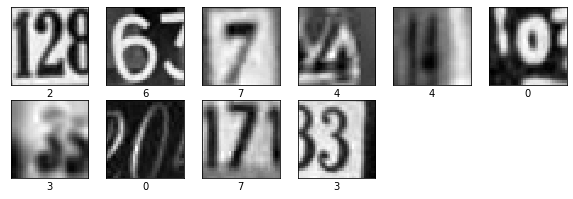

----------------- 


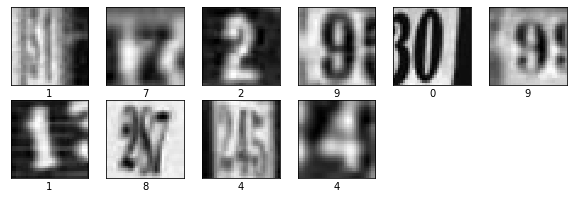

----------------- 


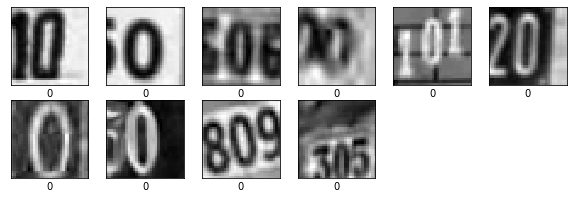

In [28]:
import matplotlib.pyplot as plt 
%matplotlib inline 
print('Displaying 10 images for train, test and val')
lst = [[X_train, y_train],[X_test, y_test],[X_val, y_val]] 
for k in range(3):
  print('----------------- ')
  plt.figure(figsize=(10,10)) # figure size
  for i in range(10): # loop first 10
      plt.subplot(6,6,i+1) 
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      plt.imshow(lst[k][0][i], cmap=plt.cm.binary) # Ploting binry figures 
      plt.xlabel(lst[k][1][i]) # giving Lables to plot images 
  plt.show()

In [0]:
# Scaling the data 
X_train_scaled = X_train/255
X_test_scaled = X_test/255
X_val_scaled = X_val/255

In [0]:
testy = tf.keras.utils.to_categorical(y_test)
trainy = tf.keras.utils.to_categorical(y_train)
valy = tf.keras.utils.to_categorical(y_val)

In [0]:
from tensorflow.keras.layers import Reshape
from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization

In [0]:
# reseting the session 
clear_session()
# Initialize Sequential model
model = Sequential() # Instantiating keras sequential models from keras 

# First layer (input layer) of  32*32 = 1024 after flattening the image of 32*32 picxels
model.add(Reshape((1024,),input_shape=(32,32,)))

#normalizing 
model.add(BatchNormalization())

In [0]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [0]:
#first Hidden layer
model.add(Dense(256,activation='relu'))

#second Hidden layer
model.add(Dense(128,activation='relu'))

#normalizing 
model.add(BatchNormalization())

#third Hidden layer
model.add(Dense(16,activation='relu'))

#Normalization
model.add(BatchNormalization())

# Final layer with activation function as softmax and 10 neurons 
model.add(Dense(10, activation='softmax'))


In [0]:
from tensorflow.keras.optimizers import SGD
# Create optimizer with non-default learning rate
sgd_optimizer = SGD(lr=0.03)

# Compile the model
model.compile('sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 1024)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
dense (Dense)                (None, 256)               262400    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                2064      
_________________________________________________________________
batch_normalization_2 (Batch (None, 16)                6

In [55]:
  #Train the model
result1 = model.fit(X_train_scaled,trainy,          
          validation_data=(X_val_scaled,valy),
          epochs=10,
          batch_size=32)

Train on 42000 samples, validate on 60000 samples
Epoch 1/10
42000/42000 [==============================] - 14s 322us/sample - loss: 0.6734 - accuracy: 0.7890 - val_loss: 0.5959 - val_accuracy: 0.8220
Epoch 2/10
42000/42000 [==============================] - 13s 320us/sample - loss: 0.6520 - accuracy: 0.7935 - val_loss: 0.4919 - val_accuracy: 0.8538
Epoch 3/10
42000/42000 [==============================] - 13s 319us/sample - loss: 0.6453 - accuracy: 0.7948 - val_loss: 0.4874 - val_accuracy: 0.8546
Epoch 4/10
42000/42000 [==============================] - 14s 325us/sample - loss: 0.6231 - accuracy: 0.8052 - val_loss: 0.4721 - val_accuracy: 0.8597
Epoch 5/10
42000/42000 [==============================] - 13s 312us/sample - loss: 0.6032 - accuracy: 0.8084 - val_loss: 0.4972 - val_accuracy: 0.8487
Epoch 6/10
42000/42000 [==============================] - 14s 322us/sample - loss: 0.6097 - accuracy: 0.8063 - val_loss: 0.4819 - val_accuracy: 0.8545
Epoch 7/10
42000/42000 [====================

In [0]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Flatten

In [0]:
#Initialize model, reshape & normalize data
model2 = Sequential()

#Reshape data from 2D (32,32) to 3D (32, 32, 1)
model2.add(Reshape((32,32,1),input_shape=(32,32,)))

#normalize data
model2.add(BatchNormalization())

In [0]:
#Add first convolutional layer
model2.add(Conv2D(32, #Number of filters 
                                 kernel_size=(5,5), #Size of the filter
                                 activation='relu')) #Size = 32-5+1 = 30

#Add second convolutional layer
model2.add(Conv2D(32, kernel_size=(5,5), activation='relu'))#Size of image = 24

#Flatten the output
model2.add(Flatten())

#Dense layer
model2.add(Dense(128, activation='relu'))

#Output layer
model2.add(Dense(10, activation='softmax'))

In [0]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [52]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_2 (Reshape)          (None, 32, 32, 1)         0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 32, 32, 1)         4         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        25632     
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               2359424   
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [56]:
#Train the model2
result2 = model2.fit(X_train_scaled,trainy,          
          validation_data=(X_val_scaled,valy),
          epochs=10,
          batch_size=32)

Train on 42000 samples, validate on 60000 samples
Epoch 1/10
42000/42000 [==============================] - 249s 6ms/sample - loss: 0.0792 - accuracy: 0.9739 - val_loss: 0.2584 - val_accuracy: 0.9467
Epoch 2/10
42000/42000 [==============================] - 249s 6ms/sample - loss: 0.0706 - accuracy: 0.9762 - val_loss: 0.2559 - val_accuracy: 0.9531
Epoch 3/10
42000/42000 [==============================] - 250s 6ms/sample - loss: 0.0615 - accuracy: 0.9800 - val_loss: 0.2770 - val_accuracy: 0.9499
Epoch 4/10
42000/42000 [==============================] - 249s 6ms/sample - loss: 0.0576 - accuracy: 0.9811 - val_loss: 0.2874 - val_accuracy: 0.9513
Epoch 5/10
42000/42000 [==============================] - 250s 6ms/sample - loss: 0.0508 - accuracy: 0.9835 - val_loss: 0.2871 - val_accuracy: 0.9534
Epoch 6/10
42000/42000 [==============================] - 249s 6ms/sample - loss: 0.0497 - accuracy: 0.9832 - val_loss: 0.2824 - val_accuracy: 0.9585
Epoch 7/10
42000/42000 [==========================

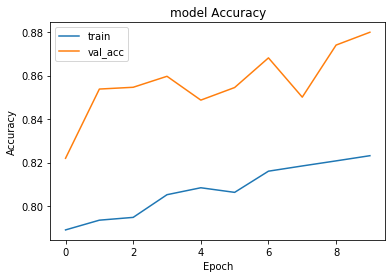

In [58]:
# summarize history for accuracy
plt.plot(result1.history['accuracy'])
plt.plot(result1.history['val_accuracy'])
plt.title('model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val_acc'], loc='upper left')
plt.show()


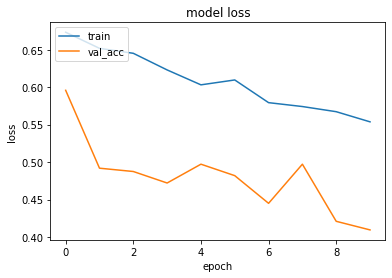

In [59]:
# summarize result1 for loss
plt.plot(result1.history['loss'])
plt.plot(result1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val_acc'], loc='upper left')
plt.show()

In [0]:
# Predicting our Both Models on Test data 
y_pred = model.predict(X_test_scaled)
y_pred2 = model2.predict(X_test_scaled)

In [61]:
# printing the confusion matrix 
from sklearn.metrics import classification_report,confusion_matrix
test1 = tf.cast(X_test_scaled, tf.float32)
print ('\n Model1 Confusion Matrix \n ')
print(confusion_matrix(model.predict_classes(test1), y_test))
print ('\n Model2 Confusion Matrix \n ')
print(confusion_matrix(model2.predict_classes(test1), y_test))


 Model1 Confusion Matrix 
 
[[1620   34   25   18   21   11   42   25   33   63]
 [  26 1559   33   34   39   13   21   66   37   31]
 [   6   20 1503   27   32   14   12   35   19   14]
 [  21   35   49 1363   25   72   18   33   47   56]
 [  28   68   40   24 1560   19   54   23   36   30]
 [   7   18   18  124   18 1491   78   13   40   44]
 [  34   18    9   32   57   69 1524   12  112   19]
 [  16   45   61   28   13    6    7 1579   12   22]
 [  16   16   17   39   21   37   59    6 1423   37]
 [  40   15   48   30   26   36   17   16   53 1488]]

 Model2 Confusion Matrix 
 
[[1665   35   23   13   19    6   33   16   22   51]
 [  26 1554   15   18   51    9   17   49   13   14]
 [  21   20 1629   23   32   14   14   56   19   31]
 [   6   21   21 1360   11   40   12   19   36   17]
 [   5   46   17   21 1557    4   16   14   16   29]
 [   8   24    7  156   33 1613   86   12   44   44]
 [  21   12    5   22   30   42 1573   12   83   20]
 [  12   58   27   22   14    4   10 159

In [63]:
# printing Classification report for model
print("classification report \n")
print(classification_report(model.predict_classes(test1),y_test))

classification report 

              precision    recall  f1-score   support

           0       0.89      0.86      0.87      1892
           1       0.85      0.84      0.85      1859
           2       0.83      0.89      0.86      1682
           3       0.79      0.79      0.79      1719
           4       0.86      0.83      0.84      1882
           5       0.84      0.81      0.82      1851
           6       0.83      0.81      0.82      1886
           7       0.87      0.88      0.88      1789
           8       0.79      0.85      0.82      1671
           9       0.82      0.84      0.83      1769

    accuracy                           0.84     18000
   macro avg       0.84      0.84      0.84     18000
weighted avg       0.84      0.84      0.84     18000



In [64]:
# printing Classification report for model
print("classification report \n")
print(classification_report(model2.predict_classes(test1),y_test))

classification report 

              precision    recall  f1-score   support

           0       0.92      0.88      0.90      1883
           1       0.85      0.88      0.86      1766
           2       0.90      0.88      0.89      1859
           3       0.79      0.88      0.83      1543
           4       0.86      0.90      0.88      1725
           5       0.91      0.80      0.85      2027
           6       0.86      0.86      0.86      1820
           7       0.88      0.91      0.89      1760
           8       0.84      0.85      0.84      1788
           9       0.86      0.85      0.85      1829

    accuracy                           0.87     18000
   macro avg       0.87      0.87      0.87     18000
weighted avg       0.87      0.87      0.87     18000

